In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import pickle
from collections import Counter
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [ ]:
def read_data(file_path):
    with open(file_path, 'rb') as f:
        data_pkl = pickle.load(f)
        return data_pkl

rna_pickle_file_name = "/content/drive/MyDrive/Colab Notebooks/data/liver_rna_seq_data.pkl"
data_rna_meta = read_data(rna_pickle_file_name)
data_rna_meta = data_rna_meta.fillna(0)
data_rna_meta = data_rna_meta[data_rna_meta['Sample ID'] != "A_10_19"]
print("rna sequencing data shape : %s" % str(data_rna_meta.shape))

liver_meta_pickle_file_name = "/content/drive/MyDrive/Colab Notebooks/data/diet/liver_metabolimics_all.pkl"
data_liver_meta = read_data(liver_meta_pickle_file_name)
data_liver_meta = data_liver_meta.fillna(0)
data_liver_meta.loc[(data_liver_meta['Genotype'].str.find('WT') != -1),'Genotype']='WT'
data_liver_meta.loc[(data_liver_meta['Genotype'].str.find('FXR') != -1),'Genotype']='FXRKO'
print("liver metabolomics shape : %s" % str(data_liver_meta.shape))

serum_meta_pickle_file_name = "/content/drive/MyDrive/Colab Notebooks/data/diet/metabolomics_serum.pkl"
data_serum_meta = read_data(serum_meta_pickle_file_name)
data_serum_meta = data_serum_meta.fillna(0)
data_serum_meta.loc[(data_serum_meta['Genotype'].str.find('WT') != -1),'Genotype']='WT'
data_serum_meta.loc[(data_serum_meta['Genotype'].str.find('FXR') != -1),'Genotype']='FXRKO'
print("serum metabolomics shape : %s" % str(data_serum_meta.shape))
print(data_serum_meta)

urine_meta_pickle_file_name = "/content/drive/MyDrive/Colab Notebooks/data/diet/metabolomics_urine.pkl"
data_urine_meta = read_data(urine_meta_pickle_file_name)
data_urine_meta = data_urine_meta.fillna(0)
data_urine_meta.loc[(data_urine_meta['Genotype'].str.find('WT') != -1),'Genotype']='WT'
data_urine_meta.loc[(data_urine_meta['Genotype'].str.find('FXR') != -1),'Genotype']='FXRKO'
print("urine metabolomics shape : %s" % str(data_urine_meta.shape))
print(data_urine_meta)

cecal_micro_pickle_file_name = "/content/drive/MyDrive/Colab Notebooks/data/cecal_microbiota_data.pkl"
data_cecal_micro = read_data(cecal_micro_pickle_file_name)
data_cecal_micro = data_cecal_micro.fillna(0)
data_cecal_micro.loc[(data_cecal_micro['Genotype'].str.find('WT') != -1),'Genotype']='WT'
data_cecal_micro.loc[(data_cecal_micro['Genotype'].str.find('FXR') != -1),'Genotype']='FXRKO'
print("cecal micro shape : %s" % str(data_cecal_micro.shape))
print(data_cecal_micro)
bile_acid_pickle_file_name = "/content/drive/MyDrive/Colab Notebooks/data/bile/bile_acid.pkl"
data_bile_acid = read_data(bile_acid_pickle_file_name)
data_bile_acid = data_bile_acid.fillna(0)
data_bile_acid = data_bile_acid.replace("No Peak",0)
print("bile acid shape : %s" % str(data_bile_acid.shape))

rna sequencing data shape : (47, 54313)
liver metabolomics shape : (72, 584)
serum metabolomics shape : (186, 59)
samples        Sample_ID Genotype Diet Sex Age (months) Group      Category  \
0         WT_CD_M_05M_01       WT   CD   M          05M     A   WT_CD_M_05M   
1         WT_CD_M_05M_02       WT   CD   M          05M     A   WT_CD_M_05M   
2         WT_CD_M_05M_03       WT   CD   M          05M     A   WT_CD_M_05M   
3         WT_CD_M_05M_04       WT   CD   M          05M     A   WT_CD_M_05M   
4         WT_CD_M_05M_05       WT   CD   M          05M     A   WT_CD_M_05M   
..                   ...      ...  ...  ..          ...   ...           ...   
181      FXR_WD_F_15M_04    FXRKO   WD   F          15M     H  FXR_WD_F_15M   
182      FXR_WD_F_15M_05    FXRKO   WD   F          15M     H  FXR_WD_F_15M   
183      FXR_WD_F_15M_06    FXRKO   WD   F          15M     H  FXR_WD_F_15M   
184      FXR_WD_F_15M_07    FXRKO   WD   F          15M     H  FXR_WD_F_15M   
185      FXR_WD_F

In [ ]:
def get_feature_list(file_path_name,sheet_name="Combined",column_value=0):
  features = pd.read_excel(file_path_name, sheet_name)
  features_list = features.iloc[:,column_value].tolist()
  return features_list

rna_combined_file = "/content/drive/MyDrive/Colab Notebooks/data/diet/42 WD vs CD_RNA seq_Uni_DEGs.xlsx"
rna_combined_features_list = get_feature_list(rna_combined_file)
print("the size of selected features list from rna sequencing: %s" % str(len(rna_combined_features_list)))

liver_combined_file = "/content/drive/MyDrive/Colab Notebooks/data/diet/87_Liver Metabolites_WD vs CD_Uni.xlsx"
liver_combined_features_list = get_feature_list(liver_combined_file)
print("the size of selected features list from liver metabolites: %s" % str(len(liver_combined_features_list)))

serum_combined_file = "/content/drive/MyDrive/Colab Notebooks/data/diet/32_Serum Metabolites_WD vs CD_Uni.xlsx"
serum_combined_features_list = get_feature_list(serum_combined_file)
print("the size of selected features list from serum metabolites: %s" % str(len(serum_combined_features_list)))

urine_combined_file = "/content/drive/MyDrive/Colab Notebooks/data/diet/51_Urine metabolites_WD vs CD_Uni.xlsx"
urine_combined_features_list = get_feature_list(urine_combined_file)
print("the size of selected features list from urine metabolites: %s" % str(len(urine_combined_features_list)))

cecal_combined_file = "/content/drive/MyDrive/Colab Notebooks/data/diet/26_Cecal microbiota_WD vs CD_Uni.xlsx"
cecal_combined_features_list = get_feature_list(cecal_combined_file,"Sheet1",2)
print("the size of selected features list from cecal micro: %s" % str(len(cecal_combined_features_list)))

the size of selected features list from rna sequencing: 42
the size of selected features list from liver metabolites: 87
the size of selected features list from serum metabolites: 32
the size of selected features list from urine metabolites: 51
the size of selected features list from cecal micro: 26


In [ ]:
bile_acid_combined_features_list =  data_bile_acid.columns.to_list()[4:]
print("the size of selected features list from bile acid: %s" % str(len(bile_acid_combined_features_list)))

the size of selected features list from bile acid: 12


In [ ]:
def get_data_x_y(data_ori,feature_list):

  genotype_str = "Genotype"
  diet_str = "Diet"
  data_ori_x = data_ori[(data_ori[genotype_str] == "WT") | (data_ori[genotype_str] == "FXRKO")][feature_list].reset_index(drop=True)
  data_ori_y = data_ori[(data_ori[genotype_str] == "WT") | (data_ori[genotype_str] == "FXRKO")][diet_str].reset_index(drop=True)
  return data_ori_x,data_ori_y

X_rna,y_rna = get_data_x_y(data_rna_meta,rna_combined_features_list)
X_liver,y_liver = get_data_x_y(data_liver_meta,liver_combined_features_list)
X_serum,y_serum = get_data_x_y(data_serum_meta,serum_combined_features_list)
X_urine,y_urine = get_data_x_y(data_urine_meta,urine_combined_features_list)
X_cecal,y_cecal = get_data_x_y(data_cecal_micro,cecal_combined_features_list)
X_bile,y_bile = get_data_x_y(data_bile_acid,bile_acid_combined_features_list)
print(X_bile)
print(y_bile)

Genotype     a-MCA    b-MCA        CA     CDCA     DCA      HDCA      LCA  \
0         0.124000   0.2110  0.190000  0.00219  0.0363  0.000000  0.00437   
1         0.509000   0.6870  0.110000  0.02290  0.0681  0.032900  0.00296   
2         0.500000   0.0000  0.420000  0.06020  0.0540  1.160000  0.01890   
3         0.328000   0.2980  0.131000  0.00357  0.0484  0.024400  0.00314   
4         0.373000   0.2840  0.126000  0.00208  0.0224  0.019900  0.00271   
..             ...      ...       ...      ...     ...       ...      ...   
181       2.833514  18.4980  1.808628  0.00282  0.1690  0.139155  0.00000   
182       0.000000  91.6457  0.001414  0.00175  0.0000  0.069672  0.00000   
183       0.452000  73.9721  0.391632  0.02170  0.0000  0.010297  0.00000   
184       0.000000  83.3612 -0.022556  0.01680  0.4240  0.007724  0.00000   
185       0.437593  73.9721  0.121861  0.00462  0.0181  0.013905  0.00000   

Genotype   T-ab-MCA    TCA      TCDCA    TLCA      UDCA  
0         11.7000

In [ ]:
def get_data_x_y_sex(data_ori,feature_list,sex_str):

  data_ori = data_ori[data_ori['Sex'] == sex_str]
  print("data_ori shape : %s" % str(data_ori.shape))
  genotype_str = "Genotype"
  diet_str = "Diet"
  data_ori_x = data_ori[(data_ori[genotype_str] == "WT") | (data_ori[genotype_str] == "FXRKO")][feature_list].reset_index(drop=True)
  data_ori_y = data_ori[(data_ori[genotype_str] == "WT") | (data_ori[genotype_str] == "FXRKO")][diet_str].reset_index(drop=True)
  return data_ori_x,data_ori_y


X_serum_male,y_serum_male = get_data_x_y_sex(data_serum_meta,serum_combined_features_list,"M")
X_urine_male,y_urine_male = get_data_x_y_sex(data_urine_meta,urine_combined_features_list,"M")
X_cecal_male,y_cecal_male = get_data_x_y_sex(data_cecal_micro,cecal_combined_features_list,"Male")

data_ori shape : (122, 59)
data_ori shape : (157, 60)
data_ori shape : (163, 379)


In [ ]:
def all_features_importance(clf,data_x,data_y,abs_flag):

  scaler = StandardScaler()
  scaler.fit(data_x)
  data_x_scaler = scaler.transform(data_x)

  clf.fit(data_x_scaler,data_y)
  imp = abs(clf.coef_[0]) if abs_flag else clf.coef_[0]
  all_features_list = data_x.columns.tolist()
  print(all_features_list)
  imp, names = zip(*sorted(list(zip(imp, all_features_list))))
  columns_name = list(names)
  columns_name.reverse()
  print(imp)
  print("columns_name : %s" % str(columns_name))
  print("columns_name shape: %s" % str(len(columns_name)))
  return columns_name
clf=SVC(kernel='linear')
rna_linear_features_important = all_features_importance(clf,X_rna,y_rna,True)
liver_linear_features_important = all_features_importance(clf,X_liver,y_liver,True)
serum_linear_features_important = all_features_importance(clf,X_serum,y_serum,True)
urine_linear_features_important = all_features_importance(clf,X_urine,y_urine,True)
cecal_linear_features_important = all_features_importance(clf,X_cecal,y_cecal,True)
bile_linear_features_important = all_features_importance(clf,X_bile,y_bile,True)
serum_male_linear_features_important = all_features_importance(clf,X_serum_male,y_serum_male,True)
urine_male_linear_features_important = all_features_importance(clf,X_urine_male,y_urine_male,True)
cecal_male_linear_features_important = all_features_importance(clf,X_cecal_male,y_cecal_male,True)

['9130409I23Rik', 'Acpp', 'Adam11', 'Adgrv1', 'Ccdc69', 'Cidec', 'Csad', 'Cyp2c40', 'Cyp2c69', 'Cyp39a1', 'Cyp3a11', 'Cyp3a59', 'D830032E09Rik', 'Dntt', 'Fasn', 'Fdft1', 'Fdps', 'Fras1', 'Glra3', 'Gm10642', 'Gm32468', 'Gm49012', 'Gramd1b', 'Hamp2', 'Lmntd2', 'Loxl4', 'Msmo1', 'Mvd', 'Nat8f6', 'Nat8f7', 'Nsdhl', 'Orm3', 'Pde5a', 'Pdzk1ip1', 'Rdh11', 'Rec8', 'Scd3', 'Slc39a4', 'Sqle', 'Srgap3', 'Tm7sf2', 'Tspyl4']
(0.000560758227129983, 0.0016099001385873855, 0.003908376620300453, 0.004724555261029495, 0.00742602284989044, 0.010074330450495514, 0.014527981264945353, 0.015516317347290687, 0.022097763311938825, 0.022232555001507698, 0.0229843927761761, 0.027594097988221652, 0.027707192827229672, 0.029770639720043457, 0.036229906789628896, 0.03868229964333048, 0.046783781639868766, 0.05048138513489727, 0.05418127405467363, 0.05778492758613082, 0.059982688456438504, 0.06068892838944237, 0.06561660379759358, 0.06717280243313806, 0.06873298596267476, 0.06937288555746352, 0.07100486809096355, 0

In [ ]:
def top_k_features_predict(clf,data_x,data_y,feature_list,top,fold):

  columns_name = feature_list[:top]
  # print("columns_name : %s" % str(columns_name))
  data_x_scaler_selected = data_x[columns_name]
  scaler = StandardScaler()
  scaler.fit(data_x_scaler_selected)
  data_x_scaler_selected = scaler.transform(data_x_scaler_selected)
  # print(data_x_scaler_selected.shape)
  svc_scores = cross_val_score(clf, data_x_scaler_selected, data_y.values.ravel(), cv=fold,n_jobs=1)
  # print(svc_scores)
  confidence_result = (196.0 * np.array(svc_scores).std()) / np.sqrt(len(svc_scores))
  # print("SVC: %0.1f%% accuracy with .95 confidence interval of %0.1f%%" % (svc_scores.mean()*100, confidence_result))
  mean_score = round(svc_scores.mean()*100,1)
  round_cr = round(confidence_result,1)
  return mean_score,round_cr

In [ ]:
def get_accuracy_list(clf,data_x,data_y,feature_list,fold):
  feature_len = len(feature_list)
  score_list = []
  confidence_score = []
  for i in range(1,feature_len):
    mean_score,round_cr = top_k_features_predict(clf,data_x,data_y,feature_list,i,fold)
    score_list.append(mean_score)
    confidence_score.append(round_cr)
  print(score_list)
  print(confidence_score)
  return score_list,confidence_score

In [ ]:
rna_accuracy_list,rna_ci = get_accuracy_list(clf,X_rna,y_rna,rna_linear_features_important,16)
liver_accuracy_list,liver_ci = get_accuracy_list(clf,X_liver,y_liver,liver_linear_features_important,20)
serum_accuracy_list,serum_ci = get_accuracy_list(clf,X_serum,y_serum,serum_linear_features_important,20)
urine_accuracy_list,urine_ci = get_accuracy_list(clf,X_urine,y_urine,urine_linear_features_important,20)
cecal_accuracy_list,cecal_ci = get_accuracy_list(clf,X_cecal,y_cecal,cecal_linear_features_important,20)

[76.0, 77.1, 80.2, 96.9, 96.9, 96.9, 96.9, 96.9, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 97.9, 97.9, 97.9, 97.9, 97.9, 97.9, 97.9, 97.9]
[14.1, 12.5, 10.5, 5.9, 5.9, 5.9, 5.9, 5.9, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]
[72.5, 93.8, 95.4, 96.7, 100.0, 96.7, 98.3, 96.7, 96.7, 95.4, 97.1, 97.1, 97.5, 100.0, 100.0, 100.0, 100.0, 98.3, 98.3, 98.3, 98.3, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 100.0, 100.0, 100.0, 98.3, 98.3, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0

In [ ]:
serum_male_accuracy_list,serum_male_ci = get_accuracy_list(clf,X_serum_male,y_serum_male,serum_male_linear_features_important,20)
urine_male_accuracy_list,urine_male_ci = get_accuracy_list(clf,X_urine_male,y_urine_male,urine_male_linear_features_important,20)
cecal_male_accuracy_list,cecal_male_ci = get_accuracy_list(clf,X_cecal_male,y_cecal_male,cecal_male_linear_features_important,20)

[87.6, 83.5, 81.2, 82.0, 84.4, 87.0, 85.4, 87.9, 91.0, 91.9, 89.4, 90.2, 89.4, 89.4, 89.4, 88.6, 89.4, 87.7, 86.2, 90.2, 89.4, 87.9, 87.0, 86.2, 88.7, 90.4, 88.8, 84.8, 86.4, 86.4, 84.8]
[7.2, 7.7, 7.1, 6.6, 7.4, 6.0, 7.0, 5.4, 5.9, 6.2, 6.1, 6.1, 6.1, 6.1, 6.5, 6.0, 6.5, 7.1, 6.9, 6.5, 7.0, 7.1, 9.0, 9.2, 7.2, 7.5, 7.4, 10.0, 8.2, 8.8, 9.8]
[91.0, 98.0, 98.0, 98.8, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]
[4.0, 2.1, 2.1, 1.6, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[56.0, 55.5, 58.1, 58.7, 58.1, 54.9, 51.2, 58.8, 61.3, 61.

In [ ]:
bile_acid_accuracy_list,bile_acid_ci = get_accuracy_list(clf,X_bile,y_bile,bile_linear_features_important,20)

[61.0, 66.6, 65.4, 64.4, 65.8, 65.3, 64.4, 64.4, 63.9, 63.9, 62.4]
[7.6, 8.0, 7.8, 9.0, 8.4, 9.7, 9.6, 9.0, 8.6, 8.7, 10.0]


In [ ]:
def substractTwoList(list1,list2):
  subtracted = list()
  for item1, item2 in zip(list1, list2):
    item = item1 - item2
    subtracted.append(item)
  # print(subtracted)
  return subtracted
def addTwoList(list1,list2):
  added = list()
  for item1, item2 in zip(list1, list2):
    item = item1 + item2
    added.append(item)
  # print(added)
  return added

In [ ]:
def draw_figure(y,ci,feature_list,legend_name):
  y_sub_ci = substractTwoList(y,ci)
  y_add_ci = addTwoList(y,ci)
  max_val = max(y)
  idx_max = int(y.index(max_val)+1)
  print("the least number of features to get the maximum accuracy %s%%: %s" % (str(max_val),str(idx_max)))
  print("feature list: %s" % str(feature_list[:idx_max]))
  t = np.arange(1, len(y)+1, 1)
  fig, ax = plt.subplots()
  ax.plot(t, y)
  ax.fill_between(t, y_sub_ci, y_add_ci, color='b', alpha=.1)
  # Get the y limits
  ymin, ymax = min(y), max(y)

  # Set the y limits making the maximum 5% greater
  ax.set_ylim(ymin-10, 100)
  ax.set(xlabel='The number of features', ylabel='Accuracy')
  ax.set_title(legend_name)
  ax.grid()
  plt.show()

the least number of features to get the maximum accuracy 100.0%: 9
feature list: ['Cyp39a1', 'Pde5a', 'Csad', 'Gramd1b', 'Slc39a4', 'Hamp2', 'Loxl4', 'Adam11', 'Rec8']


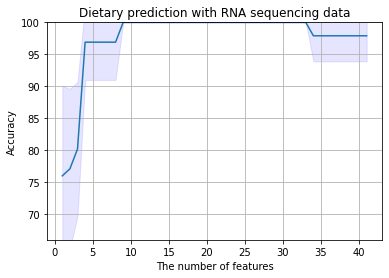

In [ ]:
draw_figure(rna_accuracy_list,rna_ci,rna_linear_features_important,"Dietary prediction with RNA sequencing data")

the least number of features to get the maximum accuracy 100.0%: 5
feature list: ['1,5-anhydroglucitol', 'linoleic acid', 'squalene', 'heptadecanoic acid', '2-aminobutyric acid']


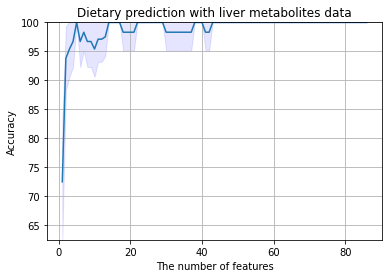

In [ ]:
draw_figure(liver_accuracy_list,liver_ci,liver_linear_features_important,"Dietary prediction with liver metabolites data")

the least number of features to get the maximum accuracy 91.6%: 17
feature list: ['N_Methylhydantoin', 'Trimethylamine', '2_Hydroxyisobutyrate', 'Methionine', 'Tyrosine', 'Ornithine', 'Histidine', 'Lysine', 'Creatine', 'Glutamine', 'Phenylalanine', '2_Oxoglutarate', 'Arginine', 'Taurine', 'Formate', 'Malate', 'Choline']


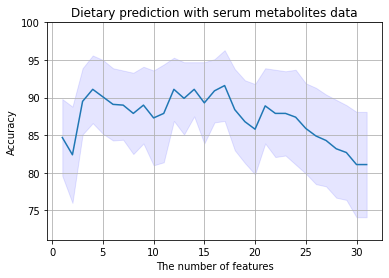

In [ ]:
draw_figure(serum_accuracy_list,serum_ci,serum_linear_features_important,"Dietary prediction with serum metabolites data")

the least number of features to get the maximum accuracy 91.9%: 10
feature list: ['Trimethylamine', '3_Hydroxyisobutyrate', 'Aspartate', 'Leucine', 'Histidine', 'Urea', '2_Oxoisocaproate', 'N_Methylhydantoin', 'Methionine', 'Asparagine']


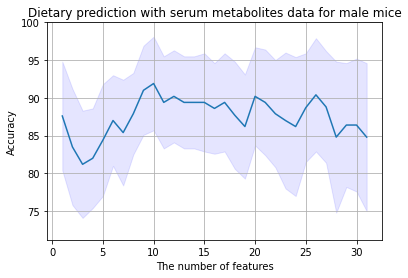

In [ ]:
draw_figure(serum_male_accuracy_list,serum_male_ci,serum_male_linear_features_important,"Dietary prediction with serum metabolites data for male mice")

the least number of features to get the maximum accuracy 100.0%: 7
feature list: ['Trimethylamine N_oxide', 'Sucrose', 'Niacinamide', 'Nicotinamide N_oxide', 'Hippurate', 'Glucose', 'Trimethylamine']


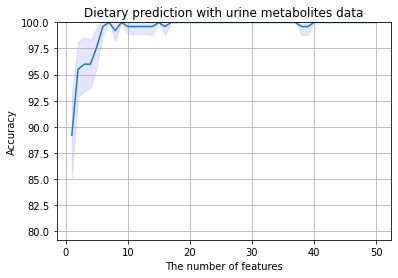

In [ ]:
draw_figure(urine_accuracy_list,urine_ci,urine_linear_features_important,"Dietary prediction with urine metabolites data")

the least number of features to get the maximum accuracy 100.0%: 5
feature list: ['Sucrose', 'Trimethylamine', 'Trimethylamine N_oxide', 'Hippurate', 'Pantothenate']


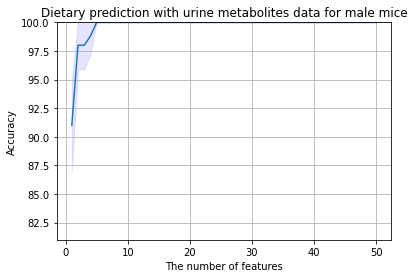

In [ ]:
draw_figure(urine_male_accuracy_list,urine_male_ci,urine_male_linear_features_important,"Dietary prediction with urine metabolites data for male mice")

the least number of features to get the maximum accuracy 68.6%: 8
feature list: ['k__Bacteria;p__Firmicutes;c__Erysipelotrichi;o__Erysipelotrichales;f__Erysipelotrichaceae;g__', 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae', 'k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Lactobacillus', 'k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae', 'k__Bacteria;p__Firmicutes', 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae;g__Oscillospira', 'k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Porphyromonadaceae;g__Parabacteroides', 'k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales']


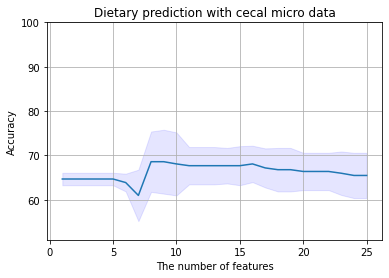

In [ ]:
draw_figure(cecal_accuracy_list,cecal_ci,cecal_linear_features_important,"Dietary prediction with cecal micro data")

the least number of features to get the maximum accuracy 62.0%: 23
feature list: ['k__Bacteria;p__Firmicutes;c__Erysipelotrichi;o__Erysipelotrichales;f__Erysipelotrichaceae;g__', 'k__Bacteria;p__Firmicutes', 'k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales', 'k__Bacteria;p__Bacteroidetes;c__Bacteroidia', 'k__Bacteria;p__Bacteroidetes', 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae;g__Oscillospira', 'k__Bacteria;p__Proteobacteria;c__Deltaproteobacteria;o__Desulfovibrionales;f__Desulfovibrionaceae;g__', 'k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Porphyromonadaceae;g__Parabacteroides', 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae', 'k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Porphyromonadaceae', 'k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides', 'k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae', 

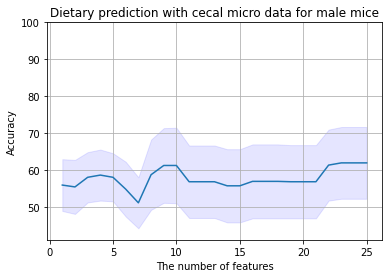

In [ ]:
draw_figure(cecal_male_accuracy_list,cecal_male_ci,cecal_male_linear_features_important,"Dietary prediction with cecal micro data for male mice")

the least number of features to get the maximum accuracy 66.6%: 2
feature list: ['a-MCA', 'b-MCA']


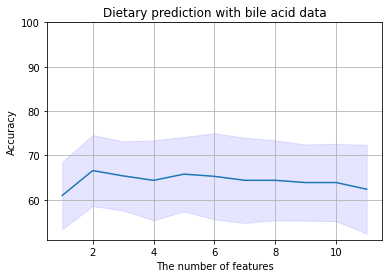

In [ ]:
draw_figure(bile_acid_accuracy_list,bile_acid_ci,bile_linear_features_important,"Dietary prediction with bile acid data")